In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#handling imbalance in data and Scaling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#Preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

#Fitting classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

#Deep Learning
import tensorflow as tf

#evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

import pickle

In [ ]:
df = pd.read_csv("/content/diabetes.csv")  # Loading updated dataset

In [ ]:


X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
        'DiabetesPedigreeFunction', 'Age' ,'FamilyHistory', 'PhysicalActivityLevel', 'DietQuality', 'SleepDuration', 'SmokingStatus'] ]
y = df['Outcome']

# Scaling features (important for ML models that depend on distance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
df.head() #Top 5 of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,FamilyHistory,PhysicalActivityLevel,DietQuality,SleepDuration,SmokingStatus
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1,1,1,1,5.78,0
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0,1,3,2,8.13,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32.0,1,0,3,3,8.74,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,0,3,2,8.33,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1,0,2,1,4.73,0


In [ ]:
df.tail() #bottom 5 of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,FamilyHistory,PhysicalActivityLevel,DietQuality,SleepDuration,SmokingStatus
995,0,103.065623,63.355668,22.695281,120.712292,27.362167,0.454,23.006444,0,0,2,2,8.377244,0
996,2,102.432339,68.115941,24.812009,82.172240,38.427753,0.324,26.090008,0,0,2,1,6.009949,0
997,0,139.743973,83.918254,25.999042,28.469495,32.536730,0.433,21.376027,0,0,2,1,7.423853,0
998,1,134.786064,101.159103,27.334445,144.057947,32.494670,0.234,45.212752,1,0,2,1,6.240428,0
999,14,173.535639,62.804756,29.822402,28.852541,33.823223,0.212,38.147306,1,0,1,1,6.327990,0


In [ ]:
df.describe().T #statistical_summary

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1000.0,3.844000,3.377436,0.000000,1.000000,3.000000,6.000000,17.00
Glucose,1000.0,121.083018,30.040149,43.471404,99.618509,116.325254,139.078396,199.00
BloodPressure,1000.0,72.352572,12.311410,23.428351,64.000000,72.000000,80.000000,122.00
SkinThickness,1000.0,27.195191,9.161955,7.000000,23.000000,23.093049,32.000000,99.00
Insulin,1000.0,93.090878,104.732593,14.000000,30.500000,37.032723,125.174158,846.00
BMI,1000.0,32.323344,6.887726,18.200000,27.500000,32.000000,36.500000,67.10
DiabetesPedigreeFunction,1000.0,0.460450,0.319619,0.078000,0.239750,0.364000,0.598500,2.42
Age,1000.0,33.440316,11.997145,19.339123,24.000000,29.000000,41.000000,81.00
Outcome,1000.0,0.343000,0.474949,0.000000,0.000000,0.000000,1.000000,1.00
FamilyHistory,1000.0,0.401000,0.490346,0.000000,0.000000,0.000000,1.000000,1.00


In [ ]:
df.info() #To find out Datatype and Null/Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Outcome                   1000 non-null   int64  
 9   FamilyHistory             1000 non-null   int64  
 10  PhysicalActivityLevel     1000 non-null   int64  
 11  DietQuality               1000 non-null   int64  
 12  SleepDuration             1000 non-null   float64
 13  SmokingStatus             1000 non-null   int64  
dtypes: float6

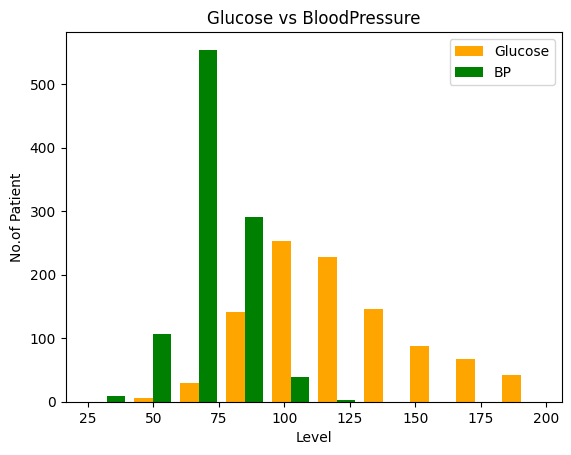

In [ ]:
#Plotting the graph- histogram, xlabel - x axis column name, ylabel - y axis, legend - top box
h1 = df['Glucose']
h2 = df['BloodPressure']
legend = ['Glucose', 'BP']
plt.hist([h1, h2], color=['orange', 'green'])
plt.xlabel("Level")
plt.ylabel("No.of Patient")
plt.legend(legend)
#plt.xticks(range(0, 3))
#plt.yticks(range(1, 2))
plt.title('Glucose vs BloodPressure')
plt.show()


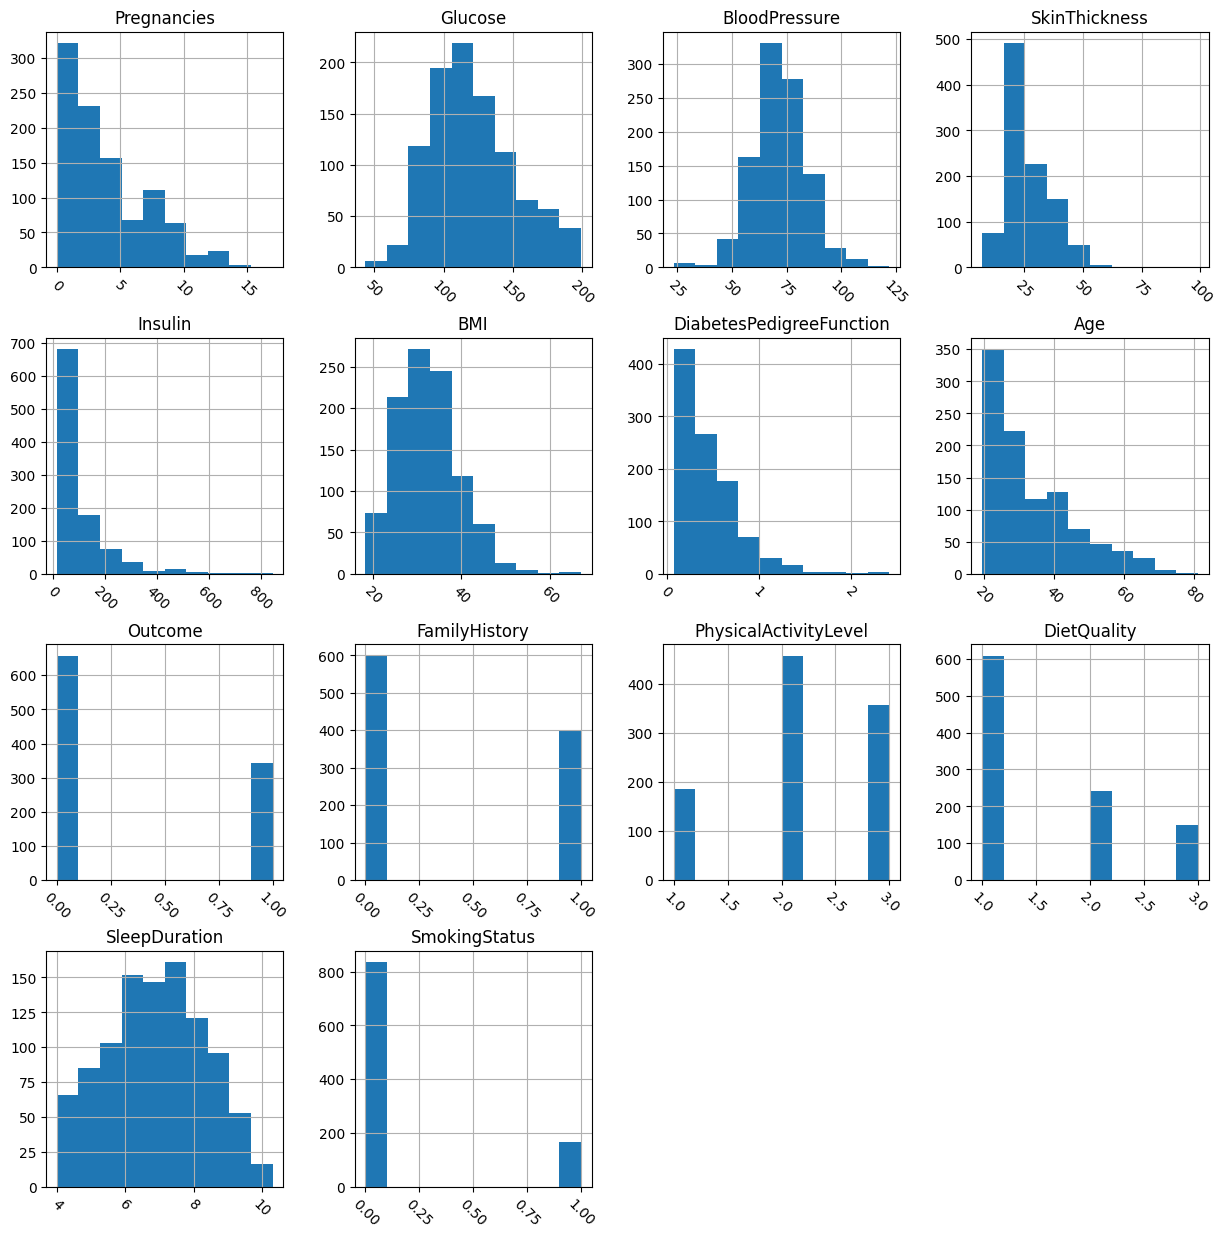

In [ ]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degrees

# Clear the text "residue"
plt.show()

<Axes: xlabel='BMI', ylabel='Density'>

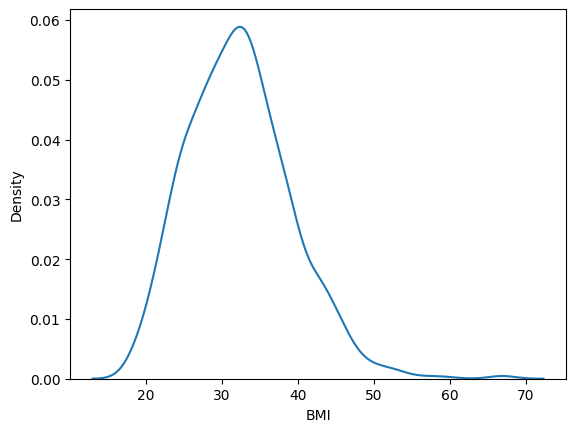

In [ ]:
# Make default density plot
sns.kdeplot(df['BMI'])
#sns.plt.show()

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

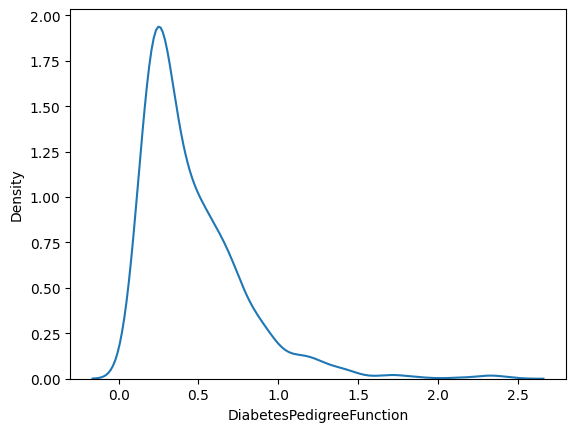

In [ ]:
sns.kdeplot(df['DiabetesPedigreeFunction'])

<Axes: ylabel='DiabetesPedigreeFunction'>

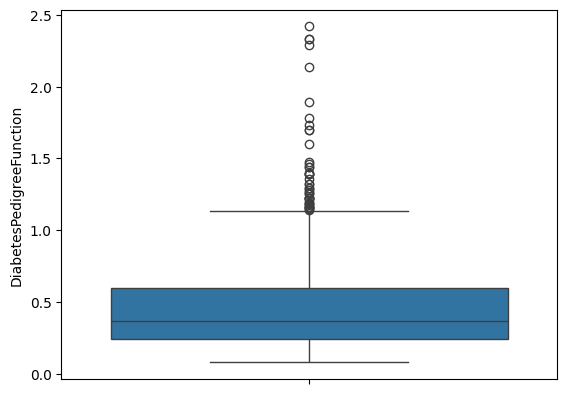

In [ ]:
# Make boxplot for one group only
sns.boxplot( y=df["DiabetesPedigreeFunction"] )

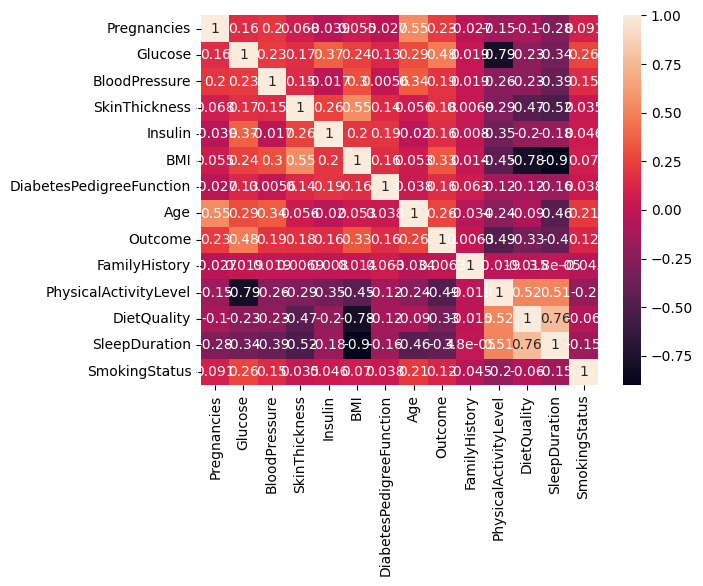

In [ ]:
# Heatmap - 1 near - strong positive correlation & Near -1 -> Strong negative correlation
#Here all values are near 0 so no features(column names) is strongly correlated
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
df1 = df

In [ ]:
# Replacing zero values with NaN
df1[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df1[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)

In [ ]:
# Count of NaN & isnull() -> how many missing values are present in dataset
df1.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0
FamilyHistory,0


<Axes: xlabel='Insulin', ylabel='Density'>

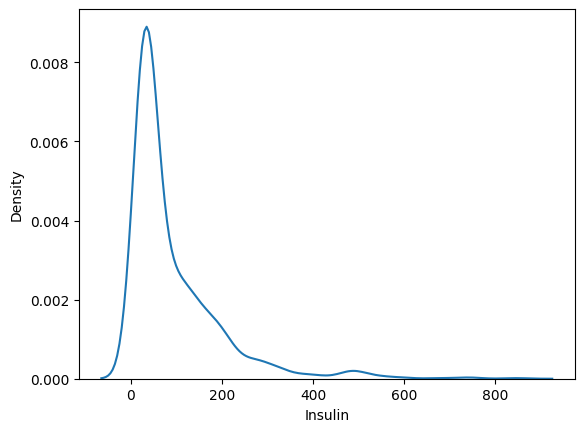

In [ ]:
#checking skewed data
sns.kdeplot(df['Insulin'])

<Axes: xlabel='SkinThickness', ylabel='Density'>

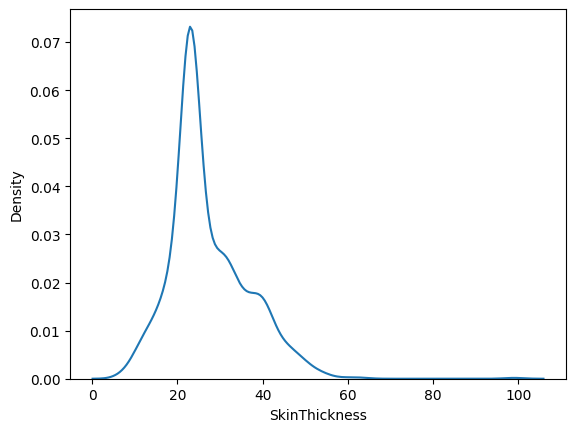

In [ ]:
sns.kdeplot(df['SkinThickness'])

In [ ]:
# Replacing NaN with mean values
#Filling NaN with median for skewed data column and with mean for normal data
df1["Glucose"].fillna(df1["Glucose"].median(), inplace = True)
df1["BloodPressure"].fillna(df1["BloodPressure"].mean(), inplace = True)
df1["SkinThickness"].fillna(df1["SkinThickness"].median(), inplace = True)
df1["Insulin"].fillna(df1["Insulin"].median(), inplace = True)
df1["BMI"].fillna(df1["BMI"].mean(), inplace = True)

<ipython-input-32-3bf7f9a60986>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["Glucose"].fillna(df1["Glucose"].median(), inplace = True)
<ipython-input-32-3bf7f9a60986>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# describe - does statistical analysis & .T is Transpose
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1000.0,3.844000,3.377436,0.000000,1.000000,3.000000,6.000000,17.00
Glucose,1000.0,121.083018,30.040149,43.471404,99.618509,116.325254,139.078396,199.00
BloodPressure,1000.0,72.352572,12.311410,23.428351,64.000000,72.000000,80.000000,122.00
SkinThickness,1000.0,27.195191,9.161955,7.000000,23.000000,23.093049,32.000000,99.00
Insulin,1000.0,93.090878,104.732593,14.000000,30.500000,37.032723,125.174158,846.00
BMI,1000.0,32.323344,6.887726,18.200000,27.500000,32.000000,36.500000,67.10
DiabetesPedigreeFunction,1000.0,0.460450,0.319619,0.078000,0.239750,0.364000,0.598500,2.42
Age,1000.0,33.440316,11.997145,19.339123,24.000000,29.000000,41.000000,81.00
Outcome,1000.0,0.343000,0.474949,0.000000,0.000000,0.000000,1.000000,1.00
FamilyHistory,1000.0,0.401000,0.490346,0.000000,0.000000,0.000000,1.000000,1.00


In [ ]:
# .iloc (index location) - searches the location
x=df1.iloc[:,df.columns !='Outcome']
y=df1.iloc[:,df.columns =='Outcome']

In [ ]:
x.head().T

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,23.000,23.000,35.000
Insulin,30.500,30.500,30.500,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
FamilyHistory,1.000,1.000,0.000,0.000,0.000
PhysicalActivityLevel,1.000,3.000,3.000,3.000,2.000


In [ ]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
x.shape

(1000, 13)

In [ ]:
#Balance
samp = SMOTE()

x_oversampled, y_oversampled =samp.fit_resample(x,y)

In [ ]:
x.shape

(1000, 13)

In [ ]:
feature_name = x.columns.tolist()
feature_name
# listing all column values of x

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'FamilyHistory',
 'PhysicalActivityLevel',
 'DietQuality',
 'SleepDuration',
 'SmokingStatus']

In [ ]:
x_norm = MinMaxScaler().fit_transform(x)
chi_selector = SelectKBest(chi2, k=13)
chi_selector.fit(x_norm, y)

SelectKBest(k=13, score_func=<function chi2 at 0x78a060af7760>)

In [ ]:
chi_support = chi_selector.get_support()
chi_feature = x.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
chi_feature

13 selected features


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'FamilyHistory',
 'PhysicalActivityLevel',
 'DietQuality',
 'SleepDuration',
 'SmokingStatus']

In [ ]:
scores = chi_selector.scores_
scores

array([8.87450289e+00, 1.73420955e+01, 1.13536183e+00, 1.50215275e+00,
       4.08499926e+00, 7.41186168e+00, 2.95480592e+00, 1.12735248e+01,
       2.34917430e-02, 5.26235196e+01, 5.40501174e+01, 1.84556934e+01,
       1.23221653e+01])

In [ ]:

# Selecting all 13 features
X = x_oversampled[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                   'DiabetesPedigreeFunction', 'Age', 'FamilyHistory', 'PhysicalActivityLevel',
                   'DietQuality', 'SleepDuration', 'SmokingStatus']].values
Y = y_oversampled.values

# Normalize
X = MinMaxScaler().fit_transform(X)


In [ ]:
type(Y)

numpy.ndarray

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
x_train.shape

(919, 13)

In [ ]:
y_test.shape

(395, 1)

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
ypredict=classifier.predict(x_test)

In [ ]:
knn=metrics.accuracy_score(y_test,ypredict)
print(knn)

0.7848101265822784


In [ ]:
model1=svm.SVC()

In [ ]:
model1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
xpredict=model1.predict(x_test)

In [ ]:
svm=metrics.accuracy_score(y_test,xpredict)
print(svm)

0.7746835443037975


In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, xpredict, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.76      0.77      0.76       188
     class 1       0.79      0.78      0.78       207

    accuracy                           0.77       395
   macro avg       0.77      0.77      0.77       395
weighted avg       0.77      0.77      0.77       395



In [ ]:
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=500, random_state=300)

In [ ]:
y_pred=dtree.predict(x_test)

In [ ]:
acc2=dtree.score(x_test,y_test)
acc2

0.8202531645569621

In [ ]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,

In [ ]:
clf=GaussianNB()
clf.fit(x_train, y_train)
preds=clf.predict(x_test)
print('accuracy with Naive Bayes:',accuracy_score(y_test, preds), '%')

accuracy with Naive Bayes: 0.739240506329114 %


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
clf=RandomForestClassifier()
clf.fit(x_train, y_train)
preds=clf.predict(x_test)
print('accuracy with Random Forest:',accuracy_score(y_test, preds), '%')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


accuracy with Random Forest: 0.8455696202531645 %


In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['log2', 'sqrt', None] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

param = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [ ]:
grid_rf=GridSearchCV(RandomForestClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_rf.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, 120],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [5, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
print(f"Best Estimator: {grid_rf.best_params_} , Best Score : {grid_rf.best_score_}")

Best Estimator: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50} , Best Score : 0.8813910667617011


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.84      0.85      0.84       188
           1       0.86      0.85      0.85       207

    accuracy                           0.85       395
   macro avg       0.85      0.85      0.85       395
weighted avg       0.85      0.85      0.85       395



<Axes: >

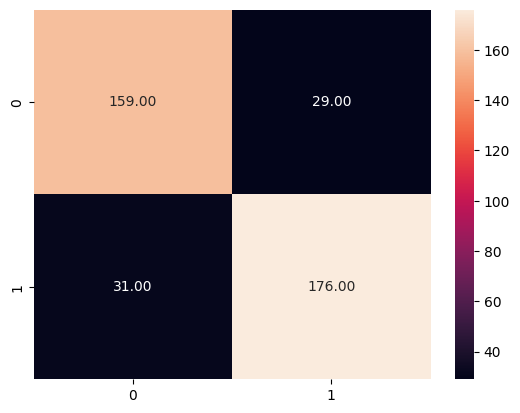

In [ ]:
model2 = RandomForestClassifier (n_estimators = 100,
               max_features = 'sqrt',
               max_depth= 50,
               min_samples_leaf=1,
               min_samples_split=2,
               bootstrap = True
               )

model2.fit(x_train,y_train)
pred2 = model2.predict(x_test)
print(classification_report(y_test, pred2))
sns.heatmap(confusion_matrix(y_test, pred2), annot=True, fmt='.2f')

In [ ]:
print('accuracy with Random Forest:',accuracy_score(y_test, pred2), '%')

accuracy with Random Forest: 0.8481012658227848 %


Random Forest AUC score: 0.8455776544351937


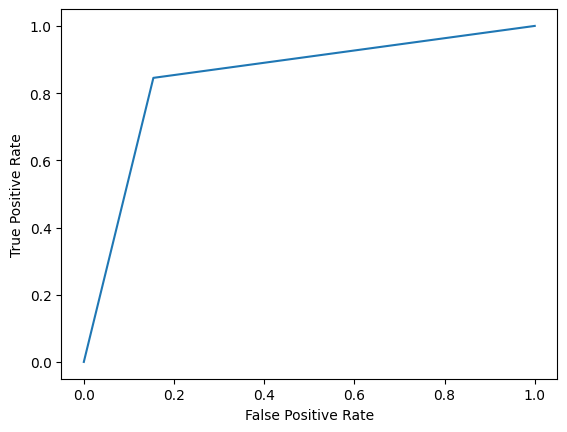

In [ ]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(y_test, preds)
print(f'Random Forest AUC score: {roc_auc_score(y_test, preds)}')



              precision    recall  f1-score   support

           0       0.83      0.85      0.84       188
           1       0.86      0.85      0.85       207

    accuracy                           0.85       395
   macro avg       0.85      0.85      0.85       395
weighted avg       0.85      0.85      0.85       395



<Axes: >

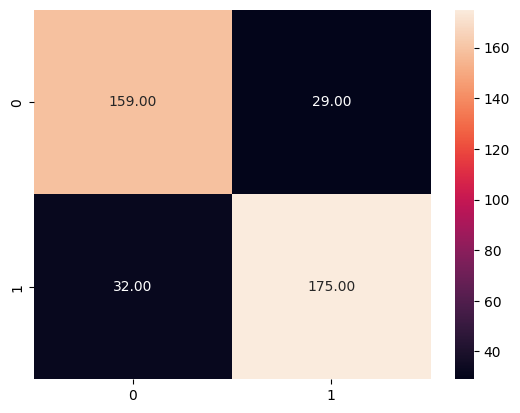

In [ ]:
print(classification_report(y_test, preds))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='.2f')

In [ ]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Grd=GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Grd.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [60, 70, 80, 100, 200, 300, 400, 500,
                                          600, 700]},
             scoring='accuracy')

In [ ]:
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")

Best Estimator: {'n_estimators': 700} , Best Score : 0.8531183178902353


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy with Gradient boosting: 0.7924050632911392 %
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       188
           1       0.80      0.81      0.80       207

    accuracy                           0.79       395
   macro avg       0.79      0.79      0.79       395
weighted avg       0.79      0.79      0.79       395



<Axes: >

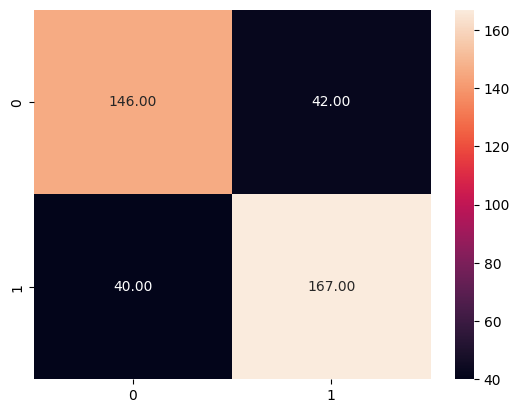

In [ ]:
model3 = GradientBoostingClassifier (n_estimators = 60
               )

model3.fit(x_train,y_train)
pred3 = model3.predict(x_test)
print('accuracy with Gradient boosting:',accuracy_score(y_test, pred3), '%')
print(classification_report(y_test, pred3))
sns.heatmap(confusion_matrix(y_test, pred3), annot=True, fmt='.2f')

Gradient Boosting AUC score: 0.8455776544351937


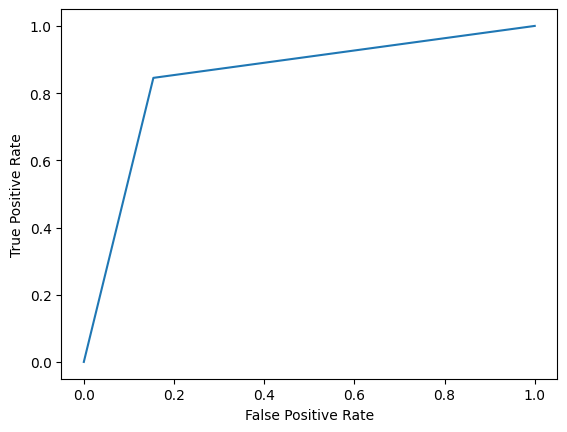

In [ ]:
plot_roc_curve(y_test, preds)
print(f'Gradient Boosting AUC score: {roc_auc_score(y_test, preds)}')

In [ ]:
pickle.dump(classifier, open('model1.pkl','wb'))
model1 = pickle.load(open('model1.pkl','rb'))

In [ ]:
data = pd.read_csv("/content/diabetes.csv")  # Loading updated dataset

In [ ]:
# Replacing NaN with mean values
data["Glucose"].fillna(data["Glucose"].mean(), inplace = True)
data["BloodPressure"].fillna(data["BloodPressure"].mean(), inplace = True)
data["SkinThickness"].fillna(data["SkinThickness"].mean(), inplace = True)
data["Insulin"].fillna(data["Insulin"].mean(), inplace = True)
data["BMI"].fillna(data["BMI"].mean(), inplace = True)

<ipython-input-87-1bfe77fb09d4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Glucose"].fillna(data["Glucose"].mean(), inplace = True)
<ipython-input-87-1bfe77fb09d4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# Split features and labels
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

In [ ]:
X, y =samp.fit_resample(X,y)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation="relu", input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7124 - loss: 0.5856 - val_accuracy: 0.7490 - val_loss: 0.5339
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7763 - loss: 0.4693 - val_accuracy: 0.7338 - val_loss: 0.5121
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: 0.4257 - val_accuracy: 0.7338 - val_loss: 0.5019
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7923 - loss: 0.4278 - val_accuracy: 0.7262 - val_loss: 0.4983
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 0.4117 - val_accuracy: 0.7452 - val_loss: 0.4886
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8169 - loss: 0.4100 - val_accuracy: 0.7605 - val_loss: 0.4867
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.4130 - val_accuracy: 0.7681 - val_loss: 0.4825
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8086 - loss: 0.3857 - val_accuracy: 0.7452 - 

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8110 - loss: 0.6650 
Test Loss: 0.6611, Test Accuracy: 0.7947


In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
print(y_pred)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[8.28631103e-01]
 [7.62002394e-02]
 [1.88283637e-01]
 [1.94344983e-01]
 [9.95818138e-01]
 [5.26546091e-02]
 [9.97797012e-01]
 [7.90293992e-01]
 [8.61748049e-07]
 [3.67877446e-02]
 [9.99950409e-01]
 [5.94676256e-01]
 [3.28871611e-05]
 [9.77967262e-01]
 [7.30163693e-01]
 [9.34654474e-01]
 [4.42175660e-03]
 [8.60411346e-01]
 [1.19141105e-03]
 [3.17011727e-05]
 [8.96639049e-01]
 [9.99446571e-01]
 [2.13672547e-03]
 [9.89116132e-01]
 [1.40125718e-04]
 [3.03493533e-03]
 [2.76827544e-01]
 [9.78057563e-01]
 [9.60845232e-01]
 [6.45361543e-01]
 [9.68462467e-01]
 [1.97307691e-02]
 [9.99519229e-01]
 [8.21194088e-04]
 [9.94713247e-01]
 [9.53960538e-01]
 [5.13237596e-01]
 [6.88242018e-01]
 [7.53809512e-01]
 [3.53374053e-04]
 [8.33960772e-01]
 [9.76437867e-01]
 [1.76826715e-02]
 [2.65542272e-04]
 [2.46760697e-04]
 [8.94742787e-01]
 [8.89205217e-01]
 [1.81864583e-04]
 [9.99946237e-01]
 [9.77500498e-01]
 [9.57009792e-01]
 [1.96545813e-02]
 [5.32082319e-01]
 [1.2720

In [ ]:
y_pred = (y_pred > 0.5).astype(int)

accuracy with ANN1: 0.7946768060836502 %
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       133
           1       0.78      0.81      0.80       130

    accuracy                           0.79       263
   macro avg       0.79      0.79      0.79       263
weighted avg       0.80      0.79      0.79       263



<Axes: >

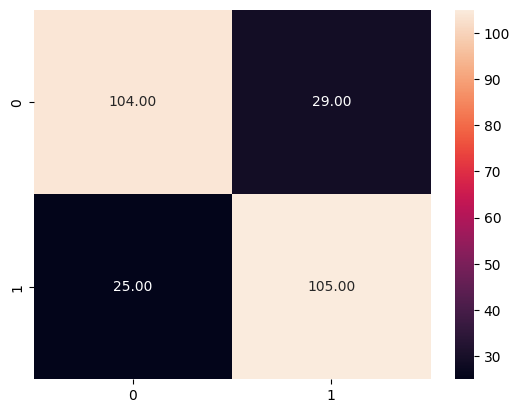

In [ ]:
print('accuracy with ANN1:',accuracy_score(y_test, y_pred), '%')
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

ANN1 AUC score: 0.7948235974551764


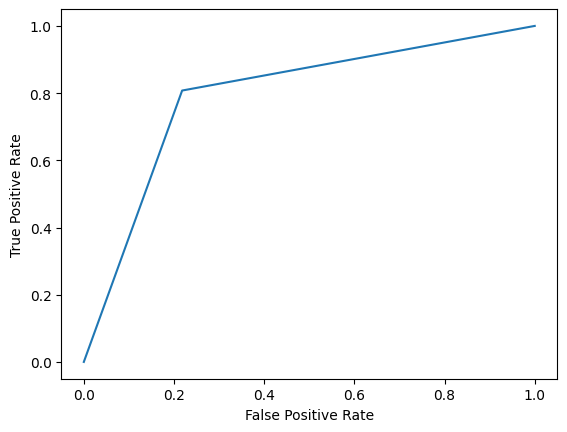

In [ ]:
plot_roc_curve(y_test, y_pred)
print(f'ANN1 AUC score: {roc_auc_score(y_test, y_pred)}')

In [ ]:
# Save the model to a file
model.save("diabetes_model.h5")
print("Model saved successfully!")

Model saved successfully!


2nd ANN

In [ ]:
# Build the ANN model
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.6088 - loss: 0.6412 - val_accuracy: 0.7262 - val_loss: 0.5504
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7347 - loss: 0.5103 - val_accuracy: 0.7452 - val_loss: 0.5285
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7907 - loss: 0.4557 - val_accuracy: 0.7376 - val_loss: 0.5314
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7713 - loss: 0.4843 - val_accuracy: 0.7414 - val_loss: 0.5161
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7964 - loss: 0.4244 - val_accuracy: 0.7414 - val_loss: 0.5068
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7864 - loss: 0.4546 - val_accuracy: 0.7338 - val_loss: 0.5151
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7986 - loss: 0.4244 - val_accuracy: 0.7452 - val_loss: 0.5188
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8041 - loss: 0.4245 - val_accuracy: 0.7490 - val_loss: 

In [ ]:
# Predicting the Test set results
y_pred1 = model1.predict(X_test)


print('*'*20)
# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
********************
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8473 - loss: 0.4928 
Test Loss: 0.4740, Test Accuracy: 0.8479


accuracy with ANN2: 0.8479087452471483 %
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       133
           1       0.80      0.92      0.86       130

    accuracy                           0.85       263
   macro avg       0.86      0.85      0.85       263
weighted avg       0.86      0.85      0.85       263



<Axes: >

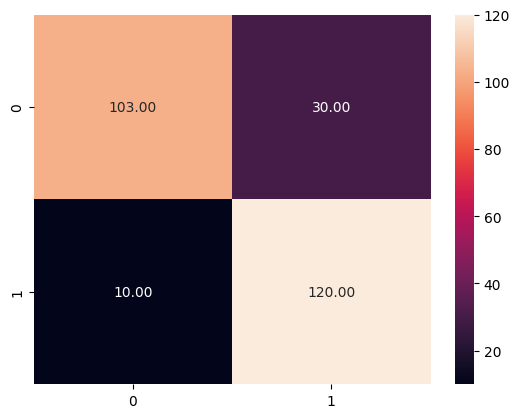

In [ ]:
y_pred1 = (y_pred1 > 0.5).astype(int)
print('accuracy with ANN2:',accuracy_score(y_test, y_pred1), '%')
print(classification_report(y_test, y_pred1))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt='.2f')

ANN2 AUC score: 0.8487565066512435


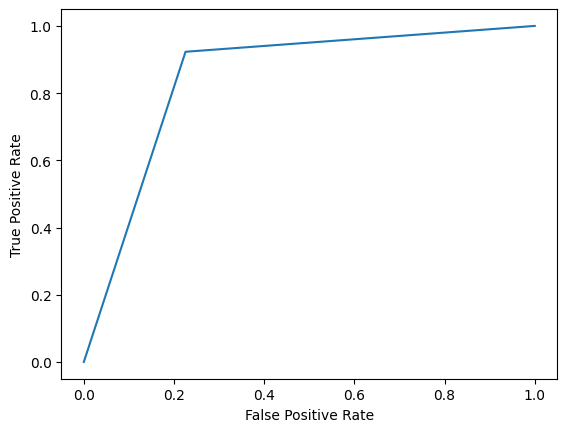

In [ ]:
plot_roc_curve(y_test, y_pred1)
print(f'ANN2 AUC score: {roc_auc_score(y_test, y_pred1)}')

In [ ]:
# !pip install flask-ngrok


In [ ]:
# import numpy as np
# import pandas as pd
# from flask import Flask, request, jsonify, render_template
# import pickle
# from flask_ngrok import run_with_ngrok

# app = Flask(__name__)
# model = pickle.load(open('model1.pkl', 'rb'))



# @app.route('/')
# def home():
#     return render_template('index.html')

# @app.route('/predict',methods=['POST'])
# def predict():
#     '''For rendering results on HTML GUI'''
#     float_features = [float(x) for x in request.form.values()]
#     final_features = [np.array(float_features)]
#     prediction = model.predict(final_features)

#     if prediction == 1:
#         pred = 'Patient is susceptible to Diabetes !!'
#     else:
#         pred = 'Patient is not susceptible to Diabetes'
#     output = pred

#     return render_template('index.html', prediction_text=output)

# if __name__ == "__main__":
#     app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
